### import library yang diperlukan

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


### membaca folder

In [23]:
img_path = 'D:\kecerdasan buatan\Posttest_KB_7\Sign Language Dataset'

### Membuat Data Generator

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2
)

### Melakukan data augmentasi dengan image data generator

In [25]:
train_generator = train_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 329 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


### Membuat arsitektur model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(160,160,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

### Compile model

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

### Training model

In [29]:
#menghentikantrain model cepat jika tidak terjadi peningkatan dalam metrik validasi
earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    verbose=1,
    restore_best_weights=True
)
#latih model 
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1,
    callbacks=[earlystop]
)

Epoch 1/10
21/21 [==============================] - 134s 6s/step - loss: 0.0084 - accuracy: 0.9970 - val_loss: 0.5458 - val_accuracy: 0.7439
Epoch 2/10
21/21 [==============================] - 122s 6s/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.5258 - val_accuracy: 0.7683
Epoch 3/10
21/21 [==============================] - 101s 5s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 1.0939 - val_accuracy: 0.5610
Epoch 4/10
21/21 [==============================] - 128s 6s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 0.9634
Epoch 5/10
21/21 [==============================] - 105s 5s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1283 - val_accuracy: 0.9390
Epoch 6/10
21/21 [==============================] - 121s 6s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3080 - val_accuracy: 0.8415
Epoch 7/10
21/21 [==============================] - 132s 6s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 0.9878
Epoch 8/10
21

### Melakukan evaluasi model data test

In [ ]:
# Evaluasi model terhadap val
test_loss, test_accuracy = model.evaluate(validation_generator)

# Cetak hasil evaluasi
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 6s 918ms/step - loss: 0.1661 - accuracy: 0.9268
Test Loss: 0.16608570516109467
Test Accuracy: 0.9268292784690857


### Grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

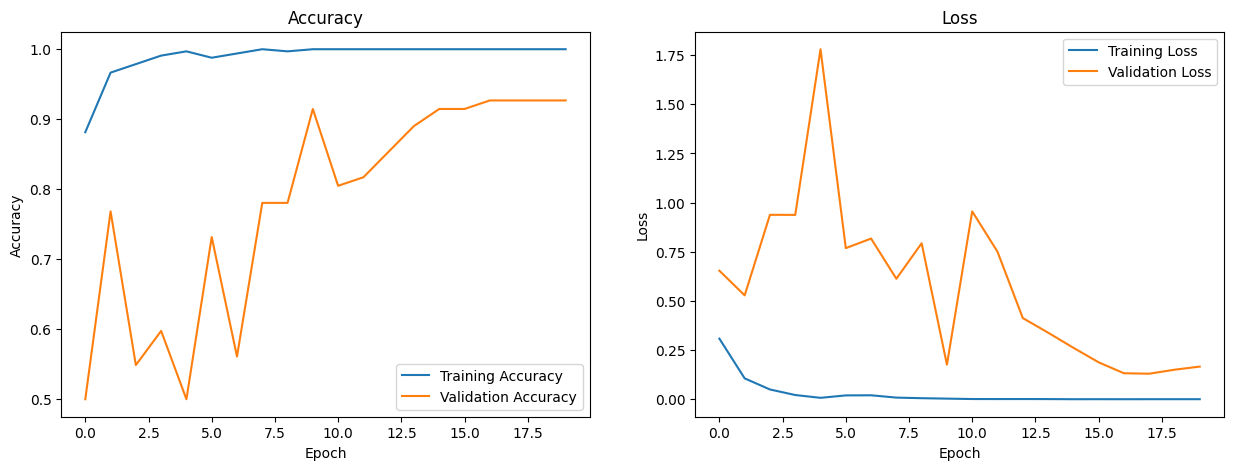

In [ ]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()